In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\franco\AppData\Local\Temp\ipykernel_5892\2201947748.py:2: SyntaxWarning: invalid escape sequence '\m'
  image_path = 'archivos\monedas.jpg'


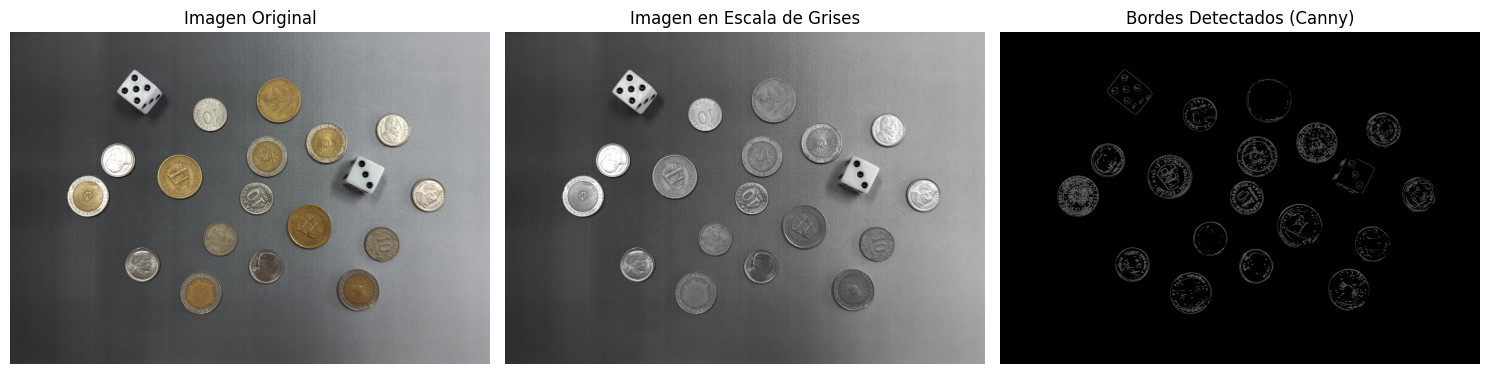

In [56]:
# Cargar la imagen proporcionada
image_path = 'archivos\monedas.jpg'
image = cv2.imread(image_path)

# Convertir la imagen a escala de grises para simplificar el procesamiento
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar un desenfoque para reducir el ruido y facilitar la segmentación
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Detectar bordes utilizando Canny Edge Detection
edges = cv2.Canny(blurred_image, 80, 180)

# Dilatar los bordes para unir fragmentos cercanos
dilated_edges = cv2.dilate(edges, None, iterations=15)

# Mostrar la imagen original, en escala de grises, y los bordes detectados
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Imagen Original")
ax[0].axis("off")

ax[1].imshow(gray_image, cmap='gray')
ax[1].set_title("Imagen en Escala de Grises")
ax[1].axis("off")

ax[2].imshow(edges, cmap='gray')
ax[2].set_title("Bordes Detectados (Canny)")
ax[2].axis("off")

plt.tight_layout()
plt.show()


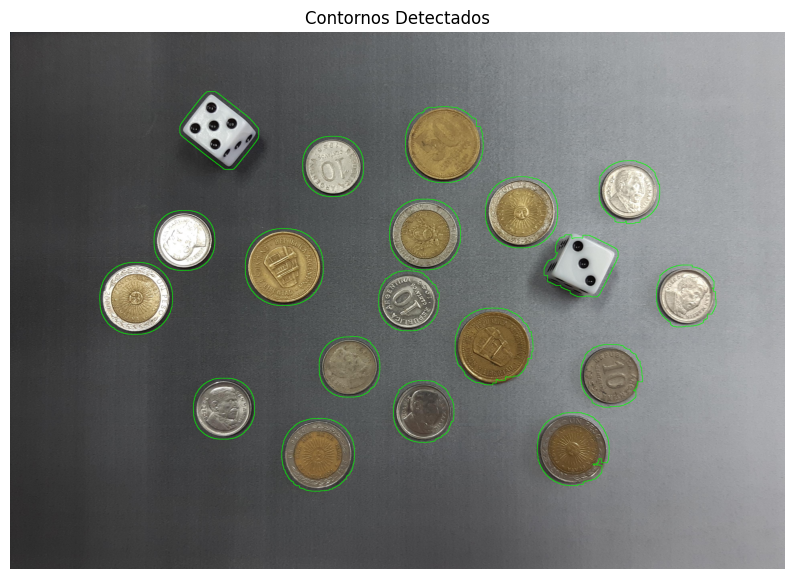

19

In [57]:
# Realizar una segmentación utilizando detección de contornos
# Encontrar los contornos en la imagen de bordes
contours, _ = cv2.findContours(dilated_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia de la imagen original para dibujar los contornos detectados
contour_image = image.copy()

# Dibujar todos los contornos detectados
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Mostrar la imagen con los contornos dibujados
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contornos Detectados")
plt.axis("off")
plt.show()

# Número total de objetos detectados
num_objects = len(contours)
num_objects


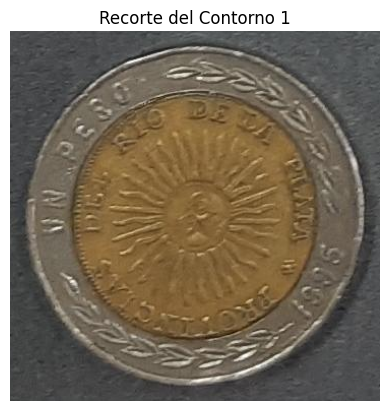

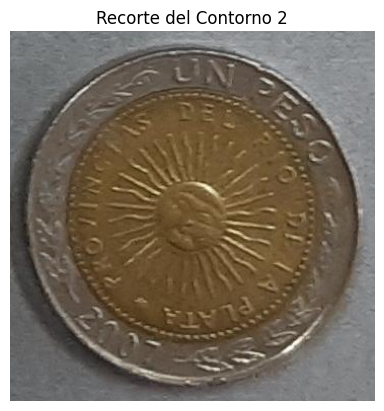

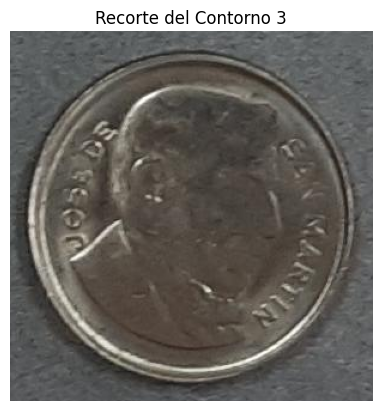

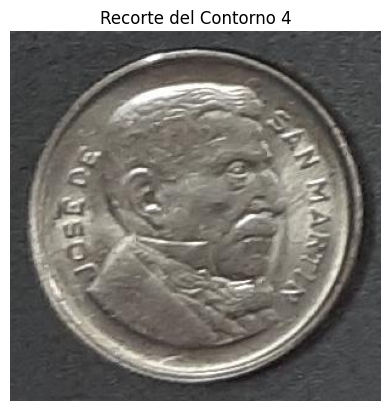

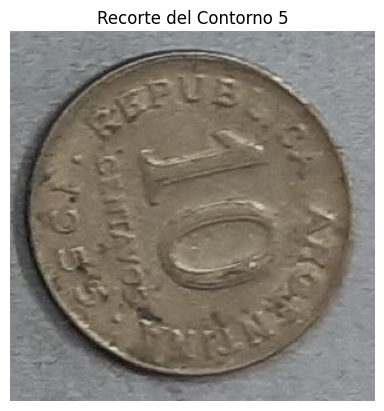

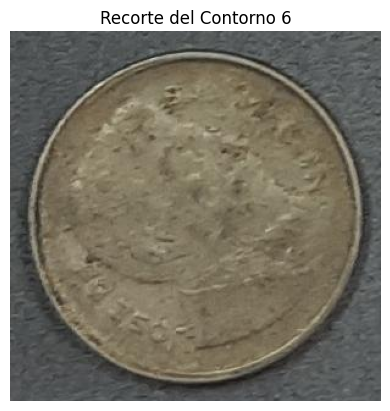

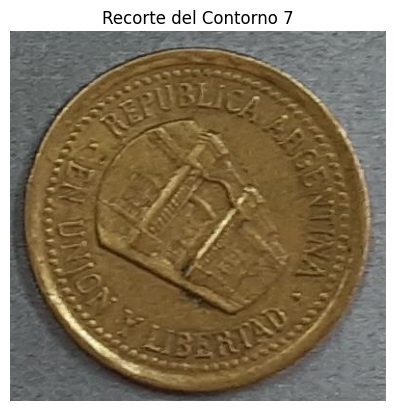

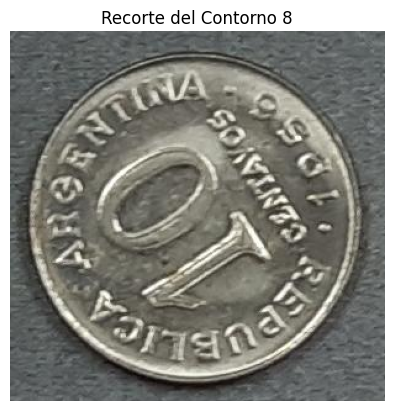

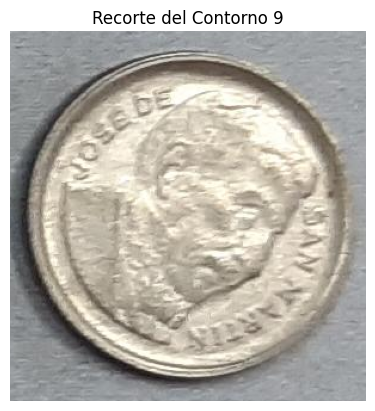

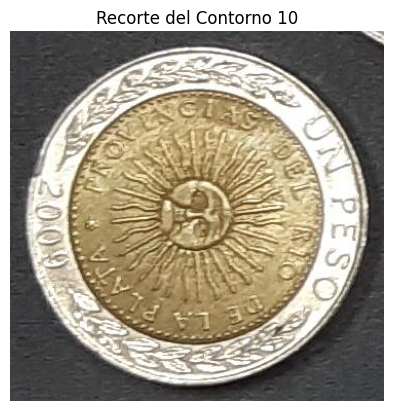

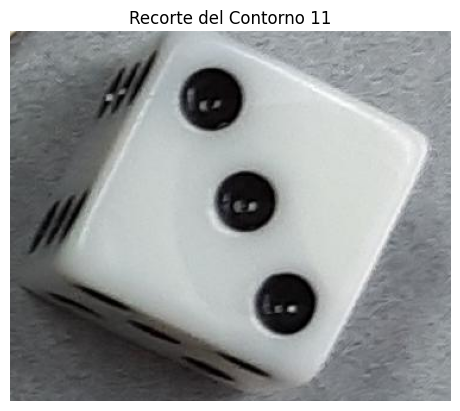

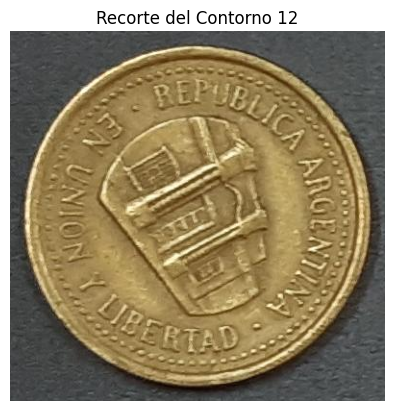

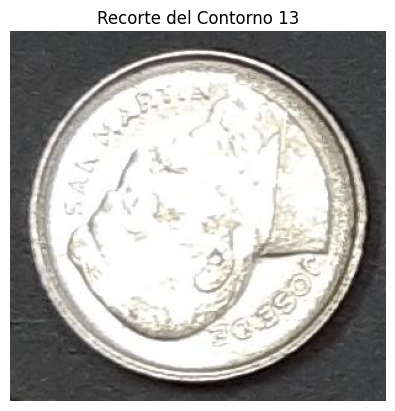

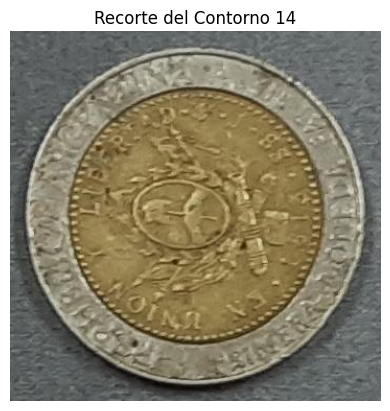

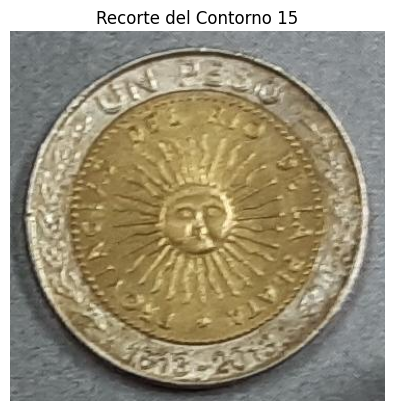

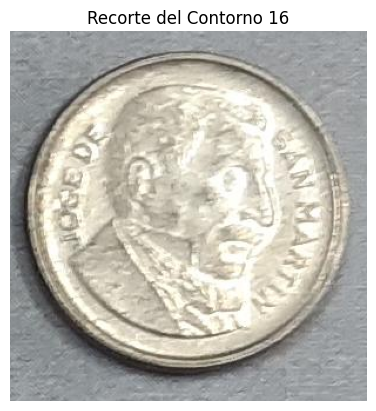

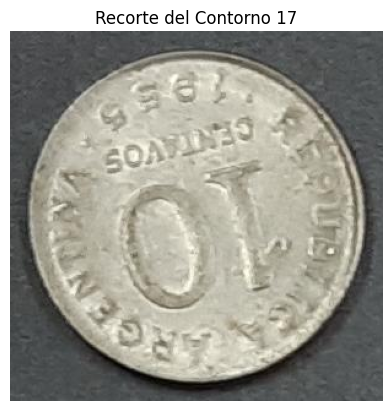

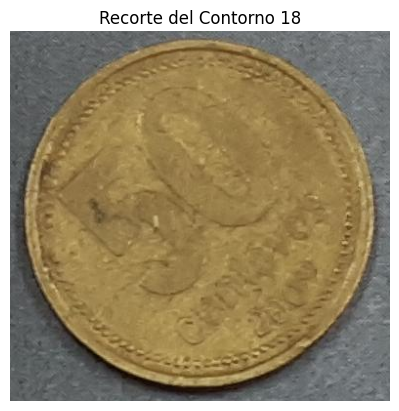

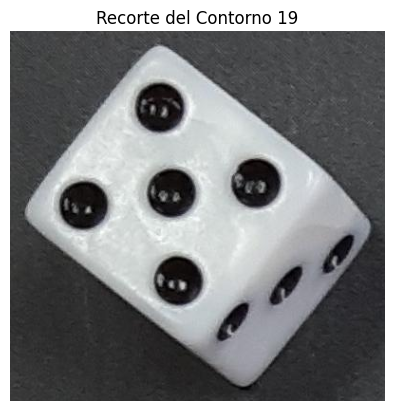

In [58]:
# Recortar cada contorno detectado y guardarlo en una lista
recortes = []
for i, contour in enumerate(contours):
    # Obtener el rectángulo delimitador para cada contorno
    x, y, w, h = cv2.boundingRect(contour)
    
    # Recortar la región del contorno de la imagen original
    recorte = image[y:y+h, x:x+w]
    recortes.append(recorte)
    
    # Mostrar el recorte individual
    plt.figure()
    plt.imshow(cv2.cvtColor(recorte, cv2.COLOR_BGR2RGB))
    plt.title(f"Recorte del Contorno {i + 1}")
    plt.axis("off")
    plt.show()